# Task 1: Develop a Machine Learning Model

### Imports

In [4]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

## Step 1: Import Data

### Import Data

In [5]:
horse_data = pd.read_csv("horse.csv")
horse_data = horse_data.drop(columns=['surgery', 'age', 'outcome', 'lived_numerical', 
                                      'died_numerical.1', 'surgery_numerical', 'no_surgery_numerical'])

### Fill in null values via imputer

In [6]:
imputer = SimpleImputer(strategy="median")
imputer.fit(horse_data)
X = imputer.transform(horse_data)
horse_data = pd.DataFrame(X, columns=horse_data.columns, index=horse_data.index)
horse_data.head()

,rectal_temp,pulse,respiratory_rate,adult_numerical,died_numerical,lived_with_surgery_numerical,lived_without_surgery_numerical
0,38.5,66.0,28.0,1.0,1.0,0.0,0.0
1,39.2,88.0,20.0,1.0,0.0,1.0,0.0
2,38.3,40.0,24.0,1.0,0.0,0.0,1.0
3,39.1,164.0,84.0,0.0,1.0,0.0,0.0
4,37.3,104.0,35.0,1.0,1.0,0.0,0.0


### Seperate attributes and targets or classes

In [7]:
horse_data_x = horse_data.drop(columns=[
    'died_numerical', 
    'lived_with_surgery_numerical', 
    'lived_without_surgery_numerical'
    ])

horse_data_y = horse_data.drop(columns=[
    'rectal_temp', 
    'pulse', 
    'respiratory_rate', 
    'adult_numerical'
    ])

In [8]:
horse_data_x.head()

,rectal_temp,pulse,respiratory_rate,adult_numerical
0,38.5,66.0,28.0,1.0
1,39.2,88.0,20.0,1.0
2,38.3,40.0,24.0,1.0
3,39.1,164.0,84.0,0.0
4,37.3,104.0,35.0,1.0


In [9]:
horse_data_y.head()

,died_numerical,lived_with_surgery_numerical,lived_without_surgery_numerical
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


## Step 2: Split Training and Test Data

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(horse_data_x, horse_data_y)

In [11]:
y_train

,died_numerical,lived_with_surgery_numerical,lived_without_surgery_numerical
150,1.0,0.0,0.0
111,0.0,1.0,0.0
36,0.0,0.0,1.0
167,0.0,1.0,0.0
235,0.0,0.0,1.0
...,...,...,...
157,0.0,0.0,1.0
45,1.0,0.0,0.0
37,0.0,1.0,0.0
136,0.0,1.0,0.0


In [12]:
y_test

,died_numerical,lived_with_surgery_numerical,lived_without_surgery_numerical
91,1.0,0.0,0.0
249,0.0,1.0,0.0
191,0.0,1.0,0.0
124,0.0,0.0,1.0
229,0.0,1.0,0.0
...,...,...,...
18,0.0,1.0,0.0
202,0.0,0.0,1.0
293,0.0,0.0,1.0
267,0.0,1.0,0.0


## Step 3: Preprocess the data

In [13]:
from sklearn import preprocessing

### Preprocessing with MinMaxScaler()

In [14]:
x_train, x_train.to_numpy();

In [15]:
nl = preprocessing.MinMaxScaler()
nlfitted = nl.fit(x_train.to_numpy())
x_train = nlfitted.transform(x_train.to_numpy())
x_train

array([[0.72222222, 0.28333333, 0.1744186 , 1.        ],
       [0.53703704, 0.08333333, 0.06976744, 1.        ],
       [0.53703704, 0.68333333, 0.06976744, 1.        ],
       [0.55555556, 0.61666667, 0.34883721, 1.        ],
       [0.51851852, 0.1       , 0.18604651, 1.        ],
       [0.35185185, 0.08333333, 0.1744186 , 1.        ],
       [0.57407407, 0.75      , 0.69767442, 0.        ],
       [0.51851852, 0.15      , 0.1744186 , 1.        ],
       [0.74074074, 0.2       , 0.65116279, 1.        ],
       [0.2037037 , 0.4       , 0.23255814, 1.        ],
       [0.51851852, 0.55      , 0.1744186 , 1.        ],
       [0.51851852, 0.28333333, 0.1744186 , 1.        ],
       [0.51851852, 0.28333333, 0.1744186 , 1.        ],
       [0.38888889, 0.11666667, 0.        , 1.        ],
       [0.5       , 0.25      , 0.02325581, 1.        ],
       [0.5       , 0.33333333, 0.13953488, 1.        ],
       [0.51851852, 0.68333333, 0.1627907 , 1.        ],
       [0.33333333, 0.25      ,

## Step 4: Build ML Classification Model

In [16]:
x_train.shape

(224, 4)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=1)

## Step 5: Test / Evaluation of the model

In [18]:
nl = preprocessing.MinMaxScaler()
nlfitted = nl.fit(x_test.to_numpy())
x_test = nlfitted.transform(x_test.to_numpy())
x_test

array([[1.        , 0.52702703, 0.35      , 1.        ],
       [0.72972973, 0.43243243, 0.5375    , 1.        ],
       [0.43243243, 0.08108108, 0.125     , 1.        ],
       [0.27027027, 0.08108108, 0.15      , 1.        ],
       [0.51351351, 0.45945946, 0.4       , 1.        ],
       [0.32432432, 0.16216216, 0.425     , 1.        ],
       [0.13513514, 0.32432432, 0.4       , 1.        ],
       [0.16216216, 0.04054054, 0.05      , 1.        ],
       [0.45945946, 0.12162162, 0.125     , 1.        ],
       [0.32432432, 0.16216216, 0.2       , 1.        ],
       [0.43243243, 0.27027027, 0.25      , 1.        ],
       [0.51351351, 0.16216216, 0.2125    , 1.        ],
       [0.56756757, 0.40540541, 0.25      , 1.        ],
       [0.54054054, 0.21621622, 0.15      , 1.        ],
       [0.54054054, 0.08108108, 0.05      , 1.        ],
       [0.45945946, 0.64864865, 0.2125    , 1.        ],
       [0.56756757, 0.10810811, 0.15      , 1.        ],
       [0.35135135, 0.24324324,

In [19]:
knn.predict(x_test)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1

In [20]:
knn.score(x_test, y_test.to_numpy())

0.5066666666666667

In [21]:
knn.score(x_train, y_train.to_numpy())

0.9330357142857143

# Task 2(a): Best Value of K with MinMaxScaler

In [22]:
horse_data = pd.read_csv("horse.csv")
horse_data = horse_data.drop(columns=['surgery', 'age', 'outcome', 'lived_numerical', 
                                      'died_numerical.1', 'surgery_numerical', 'no_surgery_numerical'])

imputer = SimpleImputer(strategy="median")
imputer.fit(horse_data)
X = imputer.transform(horse_data)
horse_data = pd.DataFrame(X, columns=horse_data.columns, index=horse_data.index)
horse_data.head()

horse_data_x = horse_data.drop(columns=[
    'died_numerical', 
    'lived_with_surgery_numerical', 
    'lived_without_surgery_numerical'
    ])

horse_data_y = horse_data.drop(columns=[
    'rectal_temp', 
    'pulse', 
    'respiratory_rate', 
    'adult_numerical'
    ])

x_train, x_test, y_train, y_test = train_test_split(horse_data_x, horse_data_y)

x_train, x_train.to_numpy();

nl = preprocessing.MinMaxScaler()
nlfitted = nl.fit(x_train.to_numpy())
x_train = nlfitted.transform(x_train.to_numpy())
nlfitted = nl.fit(x_test.to_numpy())
x_test = nlfitted.transform(x_test.to_numpy())

In [23]:
test_scores_minmax = []
train_scores_minmax = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train, y_train)
    test_score = knn.score(x_test, y_test.to_numpy())
    train_score = knn.score(x_train, y_train.to_numpy())
    
    print(f"Test score for {i}: {test_score}")
    print(f"Train score for {i}: {train_score}")
    print()
    
    test_scores_minmax.append(test_score)
    train_scores_minmax.append(train_score)

Test score for 1: 0.37333333333333335
Train score for 1: 0.9375

Test score for 2: 0.10666666666666667
Train score for 2: 0.34375

Test score for 3: 0.28
Train score for 3: 0.59375

Test score for 4: 0.08
Train score for 4: 0.375

Test score for 5: 0.2
Train score for 5: 0.5357142857142857

Test score for 6: 0.10666666666666667
Train score for 6: 0.3705357142857143

Test score for 7: 0.2
Train score for 7: 0.46875

Test score for 8: 0.12
Train score for 8: 0.33035714285714285

Test score for 9: 0.16
Train score for 9: 0.41517857142857145

Test score for 10: 0.12
Train score for 10: 0.3392857142857143

Test score for 11: 0.14666666666666667
Train score for 11: 0.38839285714285715

Test score for 12: 0.13333333333333333
Train score for 12: 0.3125

Test score for 13: 0.13333333333333333
Train score for 13: 0.38839285714285715

Test score for 14: 0.13333333333333333
Train score for 14: 0.27232142857142855

Test score for 15: 0.13333333333333333
Train score for 15: 0.36607142857142855

Test

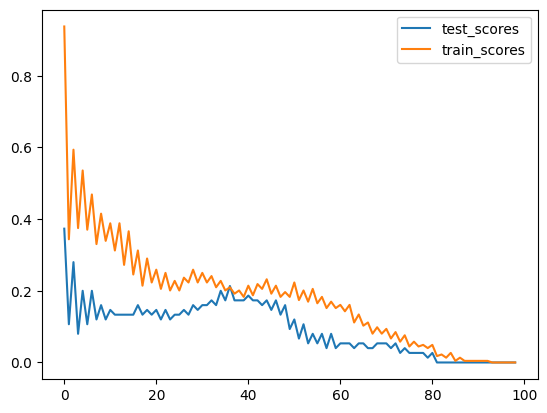

In [24]:
import matplotlib.pyplot as plt
  
x = [i for i in range(0, len(test_scores_minmax))]
  
# plot lines
plt.plot(x, test_scores_minmax, label = "test_scores")
plt.plot(x, train_scores_minmax, label = "train_scores")
plt.legend()
plt.show()

# Task 2(b): Best Value of K with MinMaxScaler

 Repeating task 2(a) by using StandardScaler() instead of MinMaxScaler ()

In [25]:
horse_data = pd.read_csv("horse.csv")
horse_data = horse_data.drop(columns=['surgery', 'age', 'outcome', 'lived_numerical', 
                                      'died_numerical.1', 'surgery_numerical', 'no_surgery_numerical'])

imputer = SimpleImputer(strategy="median")
imputer.fit(horse_data)
X = imputer.transform(horse_data)
horse_data = pd.DataFrame(X, columns=horse_data.columns, index=horse_data.index)
horse_data.head()

horse_data_x = horse_data.drop(columns=[
    'died_numerical', 
    'lived_with_surgery_numerical', 
    'lived_without_surgery_numerical'
    ])

horse_data_y = horse_data.drop(columns=[
    'rectal_temp', 
    'pulse', 
    'respiratory_rate', 
    'adult_numerical'
    ])

x_train, x_test, y_train, y_test = train_test_split(horse_data_x, horse_data_y)

x_train, x_train.to_numpy();

nl = preprocessing.StandardScaler()
nlfitted = nl.fit(x_train.to_numpy())
x_train = nlfitted.transform(x_train.to_numpy())
nlfitted = nl.fit(x_test.to_numpy())
x_test = nlfitted.transform(x_test.to_numpy())

In [26]:
test_scores_stdsclr = []
train_scores_stdsclr = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn = knn.fit(x_train, y_train)
    test_score = knn.score(x_test, y_test.to_numpy())
    train_score = knn.score(x_train, y_train.to_numpy())
    
    print(f"Test score for {i}: {test_scores_stdsclr}")
    print(f"Train score for {i}: {train_scores_stdsclr}")
    print()
    
    test_scores_stdsclr.append(test_score)
    train_scores_stdsclr.append(train_score)

Test score for 1: []
Train score for 1: []

Test score for 2: [0.3333333333333333]
Train score for 2: [0.9508928571428571]

Test score for 3: [0.3333333333333333, 0.18666666666666668]
Train score for 3: [0.9508928571428571, 0.38392857142857145]

Test score for 4: [0.3333333333333333, 0.18666666666666668, 0.32]
Train score for 4: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429]

Test score for 5: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666]
Train score for 5: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855]

Test score for 6: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36]
Train score for 6: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855, 0.47767857142857145]

Test score for 7: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24]
Train score for 7: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855

Test score for 24: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668]
Train score for 24: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855, 0.47767857142857145, 0.29017857142857145, 0.4642857142857143, 0.33035714285714285, 0.4419642857142857, 0.3080357142857143, 0.39285714285714285, 0.28125, 0.38839285714285715, 0.2544642857142857, 0.3125, 0.21428571428571427, 0.29464285714285715, 0.20982142857142858, 0.2767857142857143, 0.17410714285714285, 0.23214285714285715, 0.17410714285714285, 0.23214285714285715]

Test score for 25: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.

Test score for 38: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333]
Train score for 38: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855, 0.47767857142857145, 0.29017857142857145, 0.4642857142857143, 0.33035714285714285, 0.4419642857142857, 0.3080357142857143, 0.39285714285714285, 0.28125, 0.38839285714285715, 0.2544642857142857, 0.3125, 0.21428571428571427, 0.29464285714285715, 0.20982142857142858, 0.2767857142857143, 0.17410714285

Test score for 44: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08]
Train score for 44: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855, 0.47767857142857145, 0.29017857142857145, 0.4642857142857143, 0.33035714285714285, 0.4419642857142857, 0.3080357142857143, 0.39285714285714285, 0.28125, 0.38839285714285715, 0.2544642857142857, 0.3125, 

Test score for 50: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08]
Train score for 50: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855, 0.47767857142857145, 0.29017857142857145, 0.4642857142857143, 0.33035714285714285, 0.4419642857142857, 0.3080357142857143, 0.39285714285714285, 0.28125

Test score for 57: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04]
Train score for 57: [0.9508928571428571, 0.38392857142857145, 0.6428571428571429, 0.33482142857142855, 0.47767857142857145

Test score for 64: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.04, 0.04, 0.04, 0.04, 0.04]
Train score for 64: [0.9508928571428571, 0.3839285

Test score for 70: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.02666666666666667, 0.04, 0.013333333

Test score for 77: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.02666666666666667, 0.04, 0.013333333

Test score for 84: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.02666666666666667, 0.04, 0.013333333

Test score for 91: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.02666666666666667, 0.04, 0.013333333

Test score for 97: [0.3333333333333333, 0.18666666666666668, 0.32, 0.22666666666666666, 0.36, 0.24, 0.36, 0.26666666666666666, 0.28, 0.21333333333333335, 0.26666666666666666, 0.18666666666666668, 0.25333333333333335, 0.17333333333333334, 0.21333333333333335, 0.12, 0.21333333333333335, 0.16, 0.2, 0.16, 0.2, 0.14666666666666667, 0.18666666666666668, 0.12, 0.18666666666666668, 0.14666666666666667, 0.17333333333333334, 0.14666666666666667, 0.14666666666666667, 0.13333333333333333, 0.13333333333333333, 0.12, 0.13333333333333333, 0.10666666666666667, 0.12, 0.10666666666666667, 0.13333333333333333, 0.10666666666666667, 0.12, 0.09333333333333334, 0.10666666666666667, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.08, 0.08, 0.08, 0.06666666666666667, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.05333333333333334, 0.06666666666666667, 0.04, 0.05333333333333334, 0.02666666666666667, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.02666666666666667, 0.04, 0.013333333

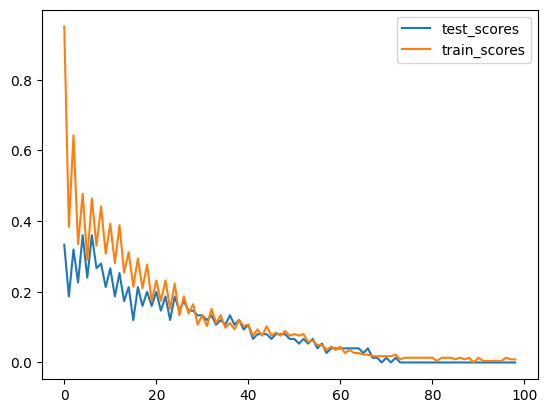

In [27]:
import matplotlib.pyplot as plt
  
x = [i for i in range(0, len(test_scores_stdsclr))]
  
# plot lines
plt.plot(x, test_scores_stdsclr, label = "test_scores")
plt.plot(x, train_scores_stdsclr, label = "train_scores")
plt.legend()
plt.show()

# TASK 3: BEST VALUE OF K

Finding the best value of K and best scalar

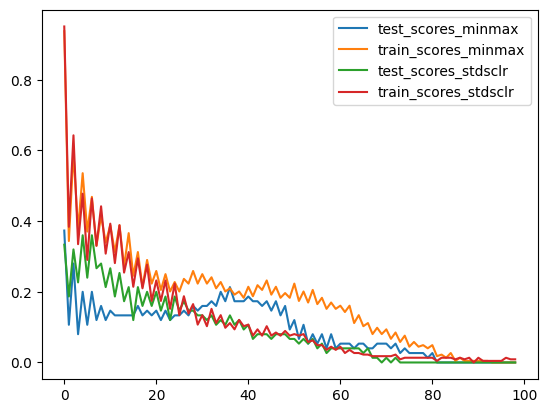

In [28]:
import matplotlib.pyplot as plt
  
x = [i for i in range(0, len(test_scores_stdsclr))]
  
# plot lines
plt.plot(x, test_scores_minmax, label = "test_scores_minmax")
plt.plot(x, train_scores_minmax, label = "train_scores_minmax")
plt.plot(x, test_scores_stdsclr, label = "test_scores_stdsclr")
plt.plot(x, train_scores_stdsclr, label = "train_scores_stdsclr")
plt.legend()
plt.show()

running a confusion matrix.

[[ 6  6  5]
 [10 12 10]
 [ 8  7 11]]


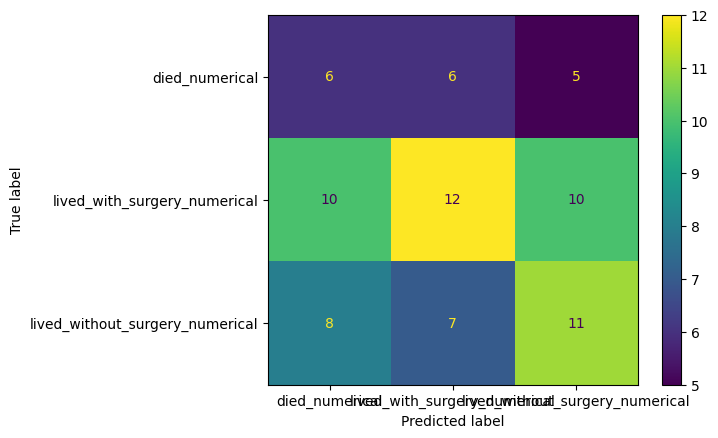

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

horse_data = pd.read_csv("horse.csv")
horse_data = horse_data.drop(columns=['surgery', 'age', 'outcome', 'lived_numerical', 
                                      'died_numerical.1', 'surgery_numerical', 'no_surgery_numerical'])

imputer = SimpleImputer(strategy="median")
imputer.fit(horse_data)
X = imputer.transform(horse_data)
horse_data = pd.DataFrame(X, columns=horse_data.columns, index=horse_data.index)
horse_data.head()

horse_data_x = horse_data.drop(columns=[
    'died_numerical', 
    'lived_with_surgery_numerical', 
    'lived_without_surgery_numerical'
    ])

horse_data_y = horse_data.drop(columns=[
    'rectal_temp', 
    'pulse', 
    'respiratory_rate', 
    'adult_numerical'
    ])

x_train, x_test, y_train, y_test = train_test_split(horse_data_x, horse_data_y)

x_train, x_train.to_numpy();

nl = preprocessing.StandardScaler()
nlfitted = nl.fit(x_train.to_numpy())
x_train = nlfitted.transform(x_train.to_numpy())
nlfitted = nl.fit(x_test.to_numpy())
x_test = nlfitted.transform(x_test.to_numpy())

knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(x_train, y_train)

predictions = knn.predict(x_test)
cm = confusion_matrix(y_test.values.argmax(axis=1), predictions.argmax(axis=1))
print(cm)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = horse_data_y).plot()

In [30]:
test_score = knn.score(x_test, y_test.to_numpy())
test_score

0.38666666666666666

In [31]:
train_score = knn.score(x_train, y_train.to_numpy())
train_score

0.9508928571428571

# TASK 4

In [32]:
new_example = np.array([[40, 200, 80, 1]])
X_example = nlfitted.transform(new_example) #The new instance
X_example

array([[2.11158985, 4.24014102, 3.06607522, 0.36927447]])

In [33]:
knn.predict(X_example)

array([[0., 1., 0.]])